## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.2, 0.8]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-l2-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 6s 130us/step - loss: 1.2972 - accuracy: 0.5350 - val_loss: 1.3083 - val_accuracy: 0.5383
Epoch 42/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.2907 - accuracy: 0.5386 - val_loss: 1.3294 - val_accuracy: 0.5255
Epoch 43/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2826 - accuracy: 0.5420 - val_loss: 1.3067 - val_accuracy: 0.5323
Epoch 44/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.2742 - accuracy: 0.5447 - val_loss: 1.3162 - val_accuracy: 0.5293
Epoch 45/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2691 - accuracy: 0.5468 - val_loss: 1.3234 - val_accuracy: 0.5288
Epoch 46/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2618 - accuracy: 0.5515 - val_loss: 1.3236 - val_accuracy: 0.5276
Epoch 47/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2566 - accuracy: 0.5499 - val_loss:

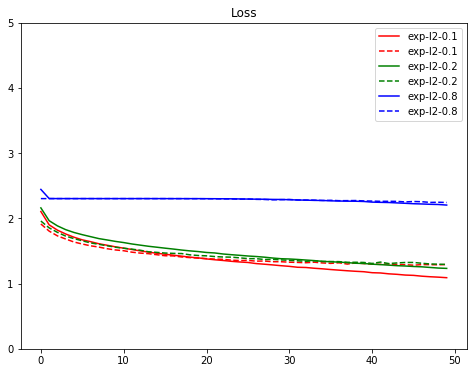

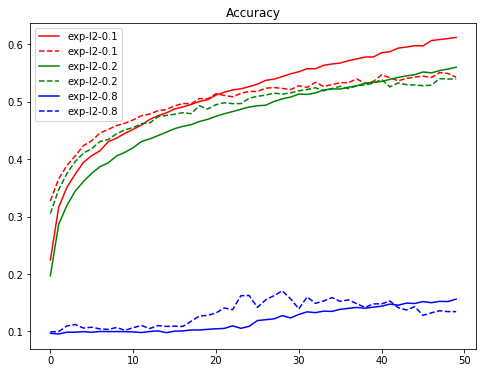

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='Adam')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-l2-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 8s 164us/step - loss: 1.1842 - accuracy: 0.5748 - val_loss: 1.3373 - val_accuracy: 0.5290
Epoch 47/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1692 - accuracy: 0.5807 - val_loss: 1.3521 - val_accuracy: 0.5250
Epoch 48/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1577 - accuracy: 0.5810 - val_loss: 1.3448 - val_accuracy: 0.5301
Epoch 49/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.1565 - accuracy: 0.5818 - val_loss: 1.3569 - val_accuracy: 0.5246
Epoch 50/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.1588 - accuracy: 0.5808 - val_loss: 1.3520 - val_accuracy: 0.5245
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
____________________________________________________

50000/50000 [==============================] - 7s 142us/step - loss: 1.4218 - accuracy: 0.4887 - val_loss: 1.4000 - val_accuracy: 0.5031
Epoch 42/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4200 - accuracy: 0.4895 - val_loss: 1.4371 - val_accuracy: 0.4847
Epoch 43/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.4287 - accuracy: 0.4857 - val_loss: 1.3988 - val_accuracy: 0.5063
Epoch 44/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.4164 - accuracy: 0.4927 - val_loss: 1.4125 - val_accuracy: 0.4965
Epoch 45/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4113 - accuracy: 0.4923 - val_loss: 1.3970 - val_accuracy: 0.5015
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4040 - accuracy: 0.4960 - val_loss: 1.4263 - val_accuracy: 0.4907
Epoch 47/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4073 - accuracy: 0.4928 - val_loss:

50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.3027 - accuracy: 0.0999 - val_loss:

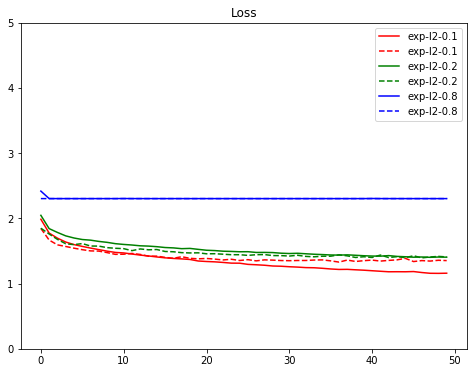

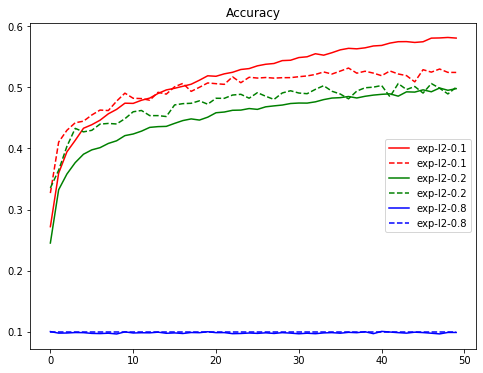

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()